In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#For image segmentation
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color


import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D

In [3]:
def image_show(image, nrows = 1, ncols =1, cmap = 'gray'):
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (14,14))
    ax.imshow(image, cmap = 'gray')
    ax.axis("off")
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

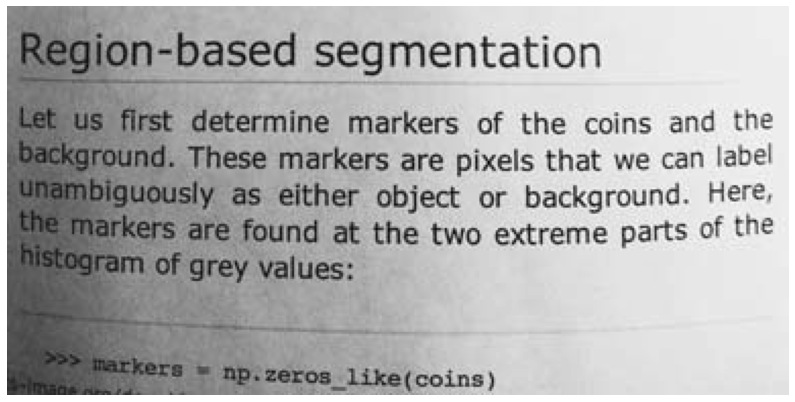

In [4]:
text = data.page()
image_show(text)

(0.0, 256.0)

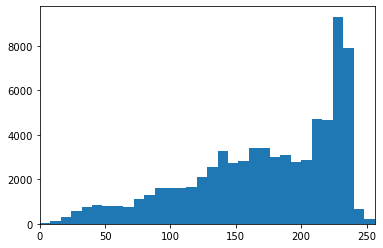

In [5]:
#Histogram to help see we see all values that are in the image
# as well as thier individual frequencies
fig,ax = plt.subplots(1,1)
ax.hist(text.ravel(), bins = 32, range= [0,256])
ax.set_xlim(0,256)

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

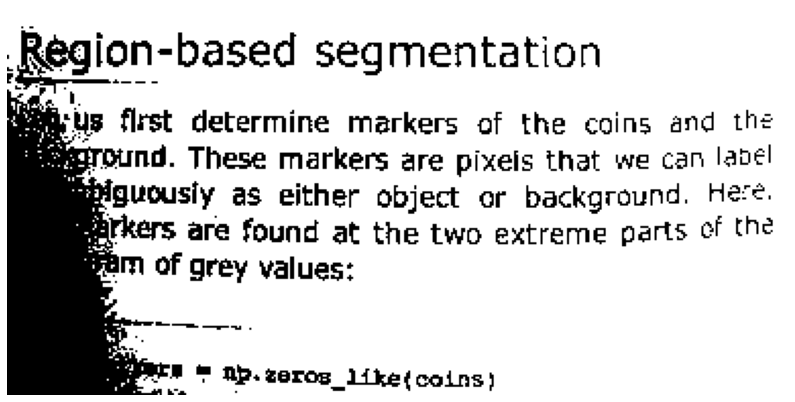

In [6]:
text_segmentted = text > 120
image_show(text_segmentted)

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

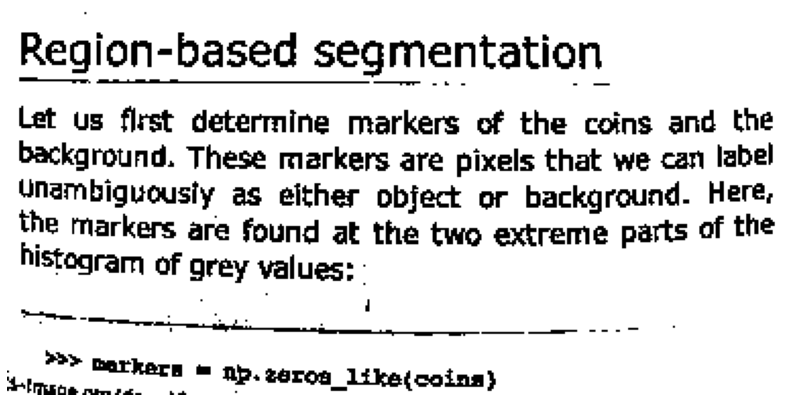

In [7]:
text_threshold = filters.threshold_local(text, block_size = 51, offset = 10)
image_show(text > text_threshold)

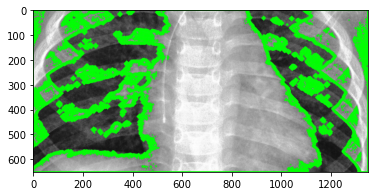

In [25]:
from skimage import io
image = io.imread('./Covid19-dataset/train/Normal/01.jpeg')
plt.imshow(image)

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

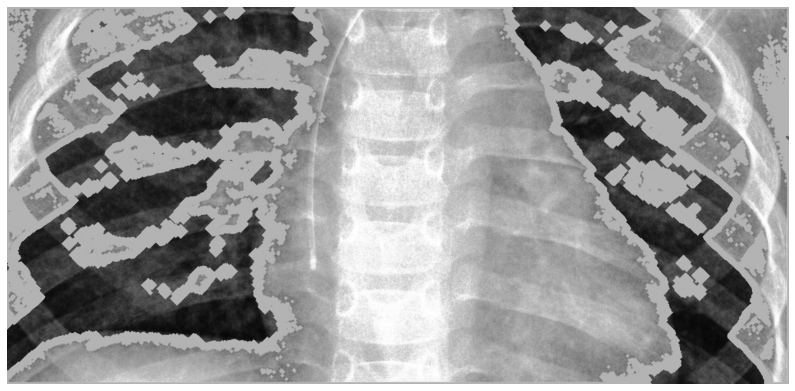

In [26]:
image_gray = color.rgb2gray(image)
image_show(image_gray)

In [43]:
def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius * np.cos(radians)
    r = center[0] + radius * np.sin(radians)
    
    return np.array([c,r]).T

points = circle_points(200, [80,250], 400)[:-1]

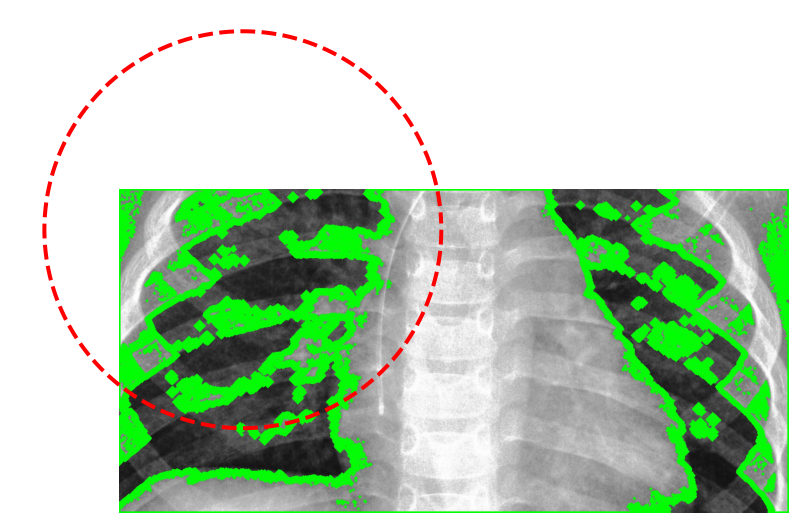

In [44]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:,1], '--r', lw= 4)

C:\Users\Denylson\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


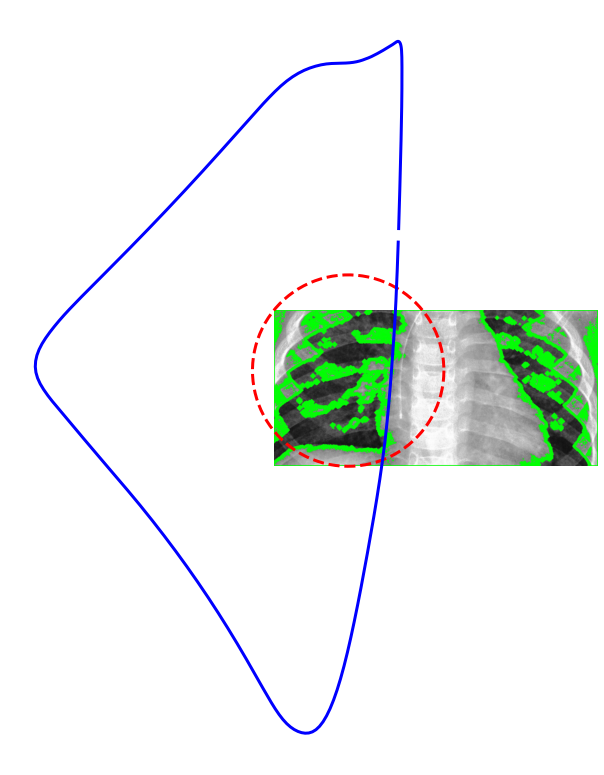

In [39]:
snake = seg.active_contour(image_gray, points)

fig, ax = image_show(image)
ax.plot(points[:,0], points[:,1], '--r', lw = 3)
ax.plot(snake[:,0], snake[:,1], '-b', lw = 3)

In [41]:
image_labels = np.zeros(image_gray.shape, dtype = np.uint8)

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

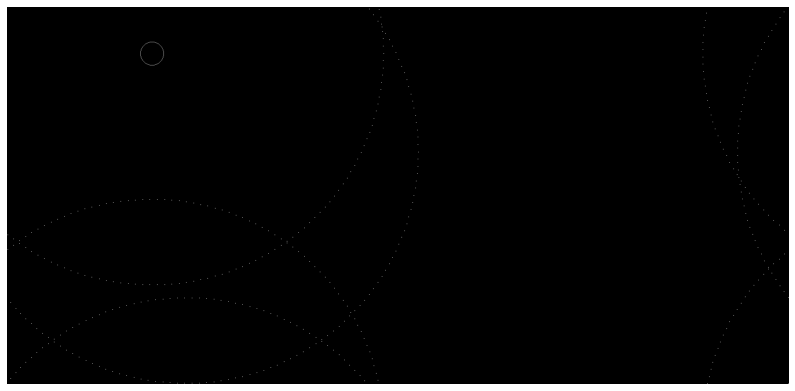

In [45]:
indices = draw.circle_perimeter(80,250,20)

image_labels[indices] = 1
image_labels[points[:,1].astype(np.int), points[:,0].astype(np.int)] = 2

image_show(image_labels)

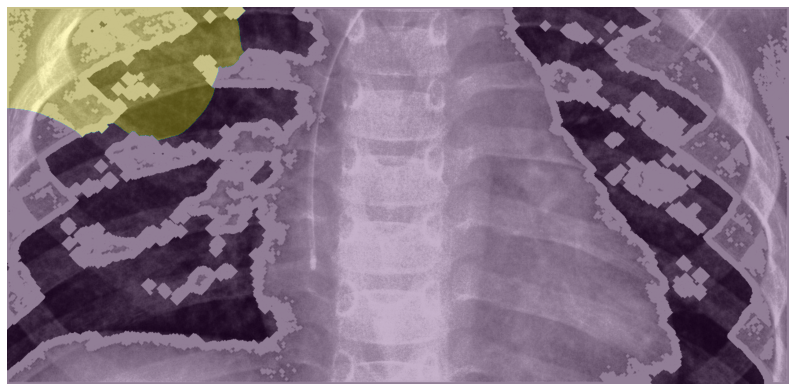

In [49]:
image_segmented = seg.random_walker(image_gray, image_labels)

fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha = 0.3)

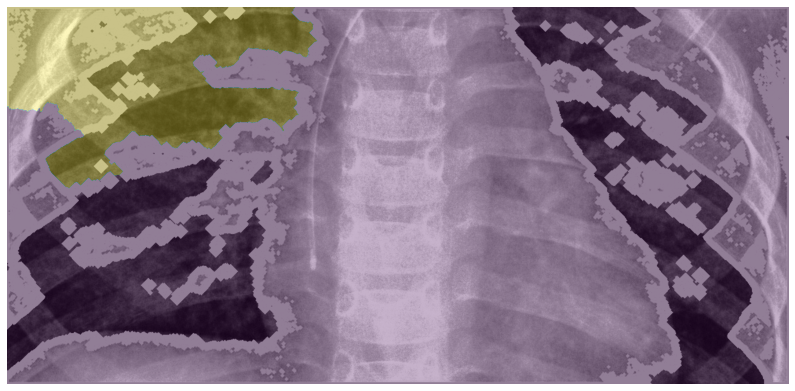

In [51]:
#tunning up the random walker technique
image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)

fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha = 0.3)

In [52]:
#UNSUPERVISED SEGMENTATION
#Simple Linear Iterative Clustering(SLIC)
#only works with color
#we are setting each sub-image or sub-region, into the average
#of that space, to make it look like patch work for easier segmentation

image_slic = seg.slic(image, n_segments = 155)

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

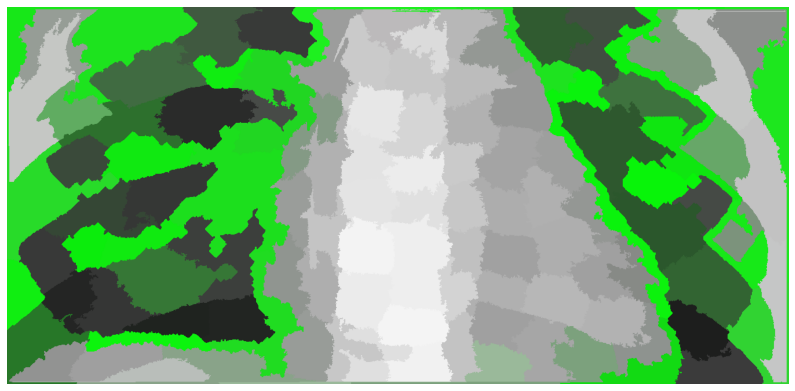

In [53]:
image_show(color.label2rgb(image_slic, image, kind = 'avg'))

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

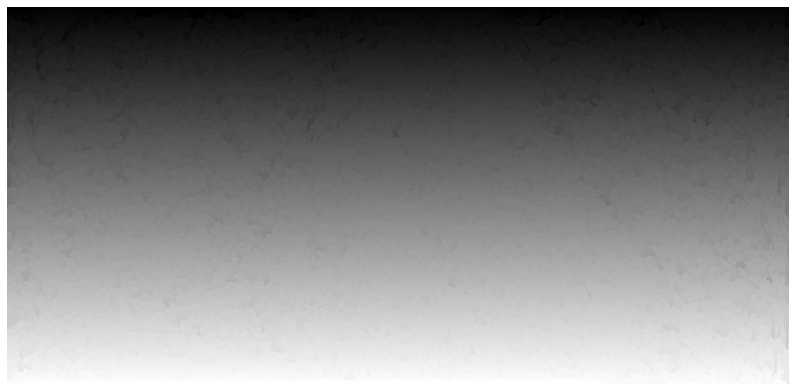

In [54]:
#NEXT UNSUPERVISED TECHNIQUE
#Felzenszwalb
#Uses Minimum Spanning Tree Clustering
#will generate as many clusters as needed

image_felzenszwalb = seg.felzenszwalb(image)
image_show(image_felzenszwalb)

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

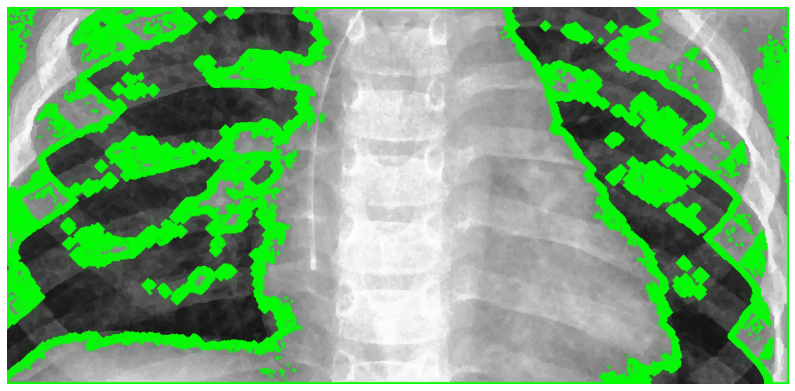

In [57]:
#now calculate unique regions
np.unique(image_felzenszwalb).size

#recolor the grsions with average similar to SLIC
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind = 'avg')

image_show(image_felzenszwalb_colored)